In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import pearsonr
import os
# from utils import Draw_fig 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import librosa.display  
fs=100

In [4]:
# 更改传感器名，将其名字统一
# 例如：
# 10.547-01231316084.csv ->  01231316084.csv
path='/home/xxx/EQ_Place/dataset/EQ_90s_02and03_15/EQ_90s_02_15/'
files=os.listdir(path)
files.sort()
for file in files:
    newname=file.split("-")[-1]
    os.rename(path + file, path + newname)

In [2]:
# 画出每个传感器的三个通道波形
if not os.path.exists('./figures/2_15'):
    os.mkdir('./figures/2_15')
path = 'C:\xxx\dataset\EQ_90s_02and03_15\EQ_90s_02_15\\'
files = os.listdir(path)
files.sort()

In [7]:
# 读取一个文件

f=files[0]
filename=path+f
print(filename)
df=pd.read_csv(filename)
df=np.array(df)[:,:3]
ex,ey,ez=df[:,0],df[:,1],df[:,2]
ex,ey,ez=ex-np.mean(ex), ey-np.mean(ey), ez-np.mean(ez)

# 使用带通滤波器效果分析
# b, a = signal.butter(3, [0.03,0.35], 'bandpass')
# fex = signal.filtfilt(b, a, ex)
# fey = signal.filtfilt(b, a, ey)
# fez = signal.filtfilt(b, a, ez)
# sos = signal.butter(3, 30, 'lowpass',fs=100,output='sos')
# fex = signal.sosfilt(sos, ex)
# fey = signal.sosfilt(sos, ey)
# fez = signal.sosfilt(sos, ez)

/home/yuanshao/EQ_Place/dataset/EQ_90s_02and03_15/EQ_90s_02_15/01231314414.csv


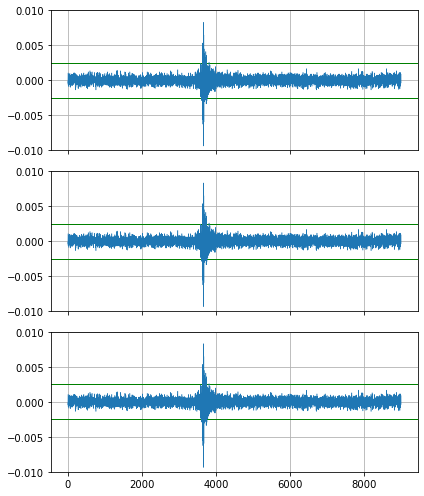

In [9]:
x_lim=np.arange(0,len(ex),1)
yline=0.0025
lim=0.01
fig, axs= plt.subplots(3, 1, sharex=True,figsize=(6, 7))
for i in range(3):
# ax1.xaxis.set_major_locator(xmajorLocator)
    axs[i].axhline(y=yline, c="green",  linewidth=1)
    axs[i].axhline(y=-yline, c="green",  linewidth=1)
    axs[i].plot(x_lim, ex, linewidth=0.5)
    # ax1.plot(x_lim, fex, linewidth=0.5)
    axs[i].set_ylim((-lim, lim))
    # axs[i].set_ylabel('X', fontsize=18)
    axs[i].grid(True)

plt.tight_layout()
# plt.clf()
# plt.close()

In [6]:
%matplotlib inline
xmajorLocator = MultipleLocator(1000)
yline=0.0025

def save_fig(ex, ey, ez, path, lim=0.01, yline=0.0025):
    x_lim=np.arange(0,len(ex),1)
    fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True,figsize=(8, 7))

    # ax1.xaxis.set_major_locator(xmajorLocator)
    ax1.axhline(y=yline, c="green",  linewidth=0.8)
    ax1.axhline(y=-yline, c="green",  linewidth=0.8)
    ax1.plot(x_lim, ex, linewidth=0.5)
    ax1.set_ylim((-0.01, 0.01))
    ax1.set_ylabel('X', fontsize=18)
    ax1.grid(True)

    # ax2.xaxis.set_major_locator(xmajorLocator)
    ax2.axhline(y=yline, c="green",  linewidth=0.8)
    ax2.axhline(y=-yline, c="green",  linewidth=0.8)
    ax2.plot(x_lim, ey, linewidth=0.5)
    ax2.set_ylim((-0.01, 0.01))
    ax2.set_ylabel('Y', fontsize=18)
    ax2.grid(True)

    # ax3.xaxis.set_major_locator(xmajorLocator)
    ax3.axhline(y=yline, c="green",  linewidth=0.8)
    ax3.axhline(y=-yline, c="green",  linewidth=0.8)
    ax3.plot(x_lim, ez, linewidth=0.5)
    ax3.set_ylim((-0.01, 0.01))
    ax3.set_ylabel('Z', fontsize=18)
    ax3.grid(True)
    plt.tight_layout()
    plt.savefig(path, dpi=100)
    plt.clf()
    plt.close()

246

In [9]:
# %matplotlib inline
for f in files:
    df=pd.read_csv(path+f)
    df=np.array(df)[:,:3]
    ex,ey,ez=df[:,0],df[:,1],df[:,2]
    ex,ey,ez=ex-np.mean(ex), ey-np.mean(ey), ez-np.mean(ez)
    filename = 'C:/xxx/code/figures/2_10/'+f[:-4]

    save_fig(ex,ey,ez,filename)


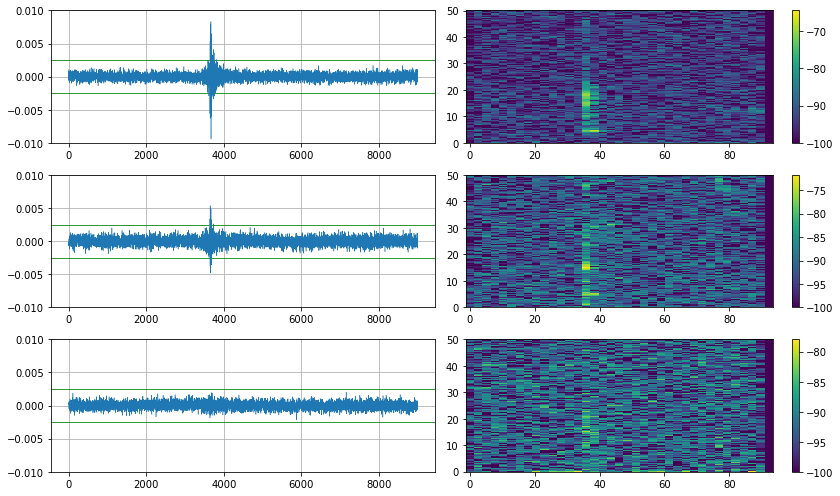

In [75]:
x_lim=np.arange(0,len(ex),1)
yline=0.0025
lim=0.01

fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12, 7))
draw_data=[ex,ey,ez]
for i in range(3):

    axs[i,0].axhline(y=yline, c="green",  linewidth=0.8)
    axs[i,0].axhline(y=-yline, c="green",  linewidth=0.8)
    axs[i,0].plot(x_lim, draw_data[i], linewidth=0.5)
    axs[i,0].set_ylim((-lim, lim))
    axs[i,0].grid(True)


    f, t, Zxx = signal.stft(draw_data[i], fs,nperseg=512)
    Zxx = librosa.amplitude_to_db(abs(Zxx))
    tt = axs[i,1].pcolormesh(t, f, Zxx, shading='auto')
    fig.colorbar(tt, ax=axs[i,1], )

plt.tight_layout()
# plt.clf()
# plt.close()